In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# We don't need y_train and y_test
(x_train, _), (x_test, _) = fashion_mnist.load_data()
print('Max value in the x_train is', x_train[0].max())
print('Min value in the x_train is', x_train[0].min())

Max value in the x_train is 255
Min value in the x_train is 0


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
# We don't need y_train and y_test
(x_train, _), (x_test, _) = mnist.load_data()
print('Max value in the x_train is', x_train[0].max())
print('Min value in the x_train is', x_train[0].min())

Max value in the x_train is 255
Min value in the x_train is 0


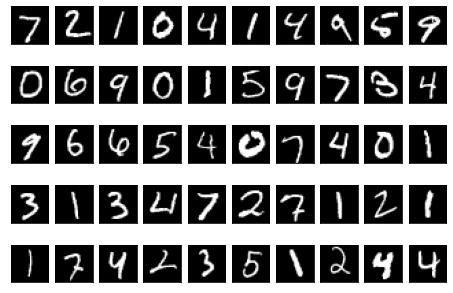

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 10) 
fig.tight_layout(pad=-1)
plt.gray()
a = 0 
for i in range(5): 
  for j in range(10): 
    axs[i, j].imshow(tf.squeeze(x_test[a])) 
    axs[i, j].xaxis.set_visible(False) 
    axs[i, j].yaxis.set_visible(False) 
    a = a + 1 

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

In [ ]:
tf.random.normal(shape=x_train.shape) 

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[-8.40498269e-01],
         [ 5.60068965e-01],
         [-4.77322012e-01],
         ...,
         [ 6.39820874e-01],
         [ 1.05807400e+00],
         [-2.12693620e+00]],

        [[ 1.20676780e+00],
         [ 5.47322452e-01],
         [-4.41919833e-01],
         ...,
         [-5.04212499e-01],
         [ 1.09116182e-01],
         [-1.12820379e-01]],

        [[ 2.69295275e-01],
         [ 3.32198709e-01],
         [ 8.91802013e-01],
         ...,
         [ 4.58447605e-01],
         [-5.69870353e-01],
         [-1.63865888e+00]],

        ...,

        [[ 1.12094021e+00],
         [ 7.51243234e-01],
         [ 3.13710272e-01],
         ...,
         [-6.60945356e-01],
         [ 1.89656448e+00],
         [ 1.93502855e+00]],

        [[ 2.45727196e-01],
         [-6.52585268e-01],
         [-6.58272266e-01],
         ...,
         [-2.35636353e+00],
         [ 2.22932920e-02],
         [-5.94609320e-01]],

      

In [ ]:
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

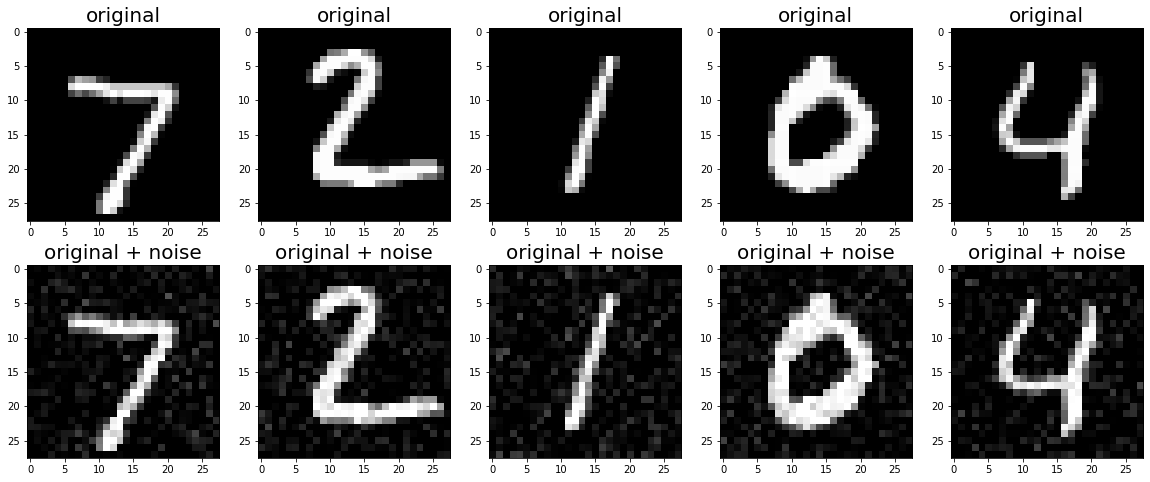

In [ ]:
n = 5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original", size=20) 
  plt.imshow(tf.squeeze(x_test[i])) 
  plt.gray() 
  bx = plt.subplot(2, n, n+ i + 1) 
  plt.title("original + noise", size=20) 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
plt.show()

In [ ]:
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input

class NoiseReducer(tf.keras.Model): 
  def __init__(self):

    super(NoiseReducer, self).__init__() 

    self.encoder = tf.keras.Sequential([ 
      Input(shape=(28, 28, 1)), 
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2), 
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)]) 
    
    self.decoder = tf.keras.Sequential([ 
      Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'), 
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'), 
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')]) 
  
  def call(self, x): 
    encoded = self.encoder(x) 
    decoded = self.decoder(encoded) 
    return decoded

In [ ]:
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input

class NoiseReducer(tf.keras.Model): 
  def __init__(self):

    super(NoiseReducer, self).__init__() 

    self.encoder = tf.keras.Sequential([ 
      Input(shape=(28, 28, 1)), 
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2)]) 
    
    self.decoder = tf.keras.Sequential([ 
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'), 
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')]) 
  
  def call(self, x): 
    encoded = self.encoder(x) 
    decoded = self.decoder(encoded) 
    return decoded

In [ ]:
autoencoder = NoiseReducer()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.fit(x_train_noisy, 
                x_train, 
                epochs=10, 
                shuffle=True, 
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0082 - val_loss: 0.0013
Epoch 2/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/10
1875/1875 [==============================] - 58s 31m

In [ ]:
encoded_imgs=autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs)

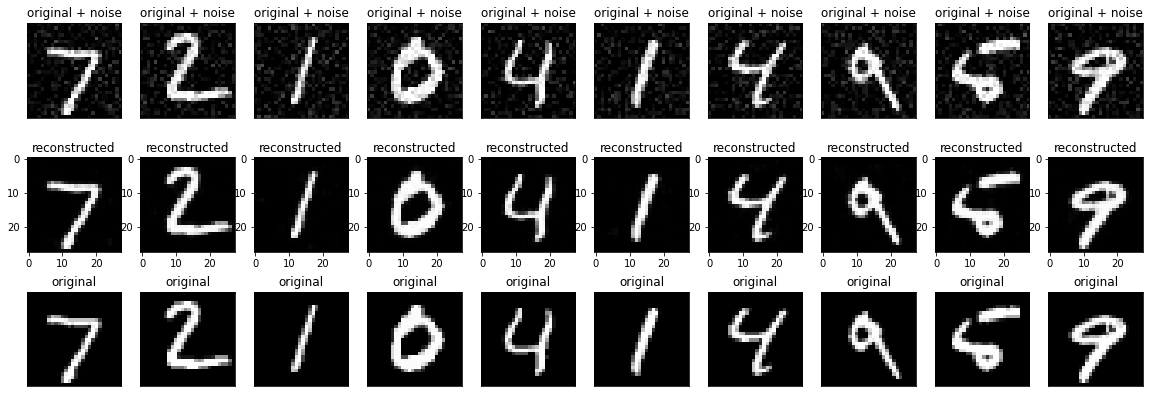

In [ ]:
n = 10 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  bx = plt.subplot(3, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  cx = plt.subplot(3, n, i + n + 1) 
  plt.title("reconstructed") 
  plt.imshow(tf.squeeze(decoded_imgs[i])) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display original 
  ax = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(x_test[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 

plt.show()